Indian Institute of Information Technology Raichur

Name: Bada Poojitha
Roll No: CS23B1012
Course: Deep Learning for Medical Imaging

Project 3
Retinal Vessel Extraction
A Comparative Study of Sauvola vs Niblack Thresholding

Project Objective

In this project, I focus on extracting thin retinal blood vessels from fundus images. Retinal vessel extraction is important in detecting diseases such as diabetic retinopathy, hypertension, and glaucoma.

My main goal is to compare two local adaptive thresholding techniques:

Niblack Thresholding

Sauvola Thresholding

I aim to analyze how effectively these methods detect thin vascular structures, which are usually difficult to segment due to low contrast and noise.

In [1]:
!pip install kagglehub scikit-image opencv-python matplotlib numpy

import kagglehub
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.filters import threshold_niblack, threshold_sauvola
from skimage.morphology import remove_small_objects, skeletonize
from skimage.util import img_as_ubyte

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams["image.cmap"] = "gray"

print("All libraries loaded successfully.")


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\pooji\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All libraries loaded successfully.


In [2]:
dataset_path = kagglehub.dataset_download(
    "andrewmvd/drive-digital-retinal-images-for-vessel-extraction"
)

print("Dataset location:")
print(dataset_path)

print("\nAvailable folders:")
print(os.listdir(dataset_path))

100%|██████████| 28.0M/28.0M [00:36<00:00, 809kB/s] 

Extracting files...


Dataset location:
C:\Users\pooji\.cache\kagglehub\datasets\andrewmvd\drive-digital-retinal-images-for-vessel-extraction\versions\1

Available folders:
['DRIVE']


In [3]:
drive_path = os.path.join(dataset_path, "DRIVE")

print("DRIVE folder contents:")
print(os.listdir(drive_path))

print("\nTraining contents:")
print(os.listdir(os.path.join(drive_path, "training")))

print("\nTest contents:")
print(os.listdir(os.path.join(drive_path, "test")))

DRIVE folder contents:
['test', 'training']

Training contents:
['1st_manual', 'images', 'mask']

Test contents:
['images', 'mask']


Total training images: 20
Selected Image: 21_training.tif
Ground Truth: 21_manual1.gif


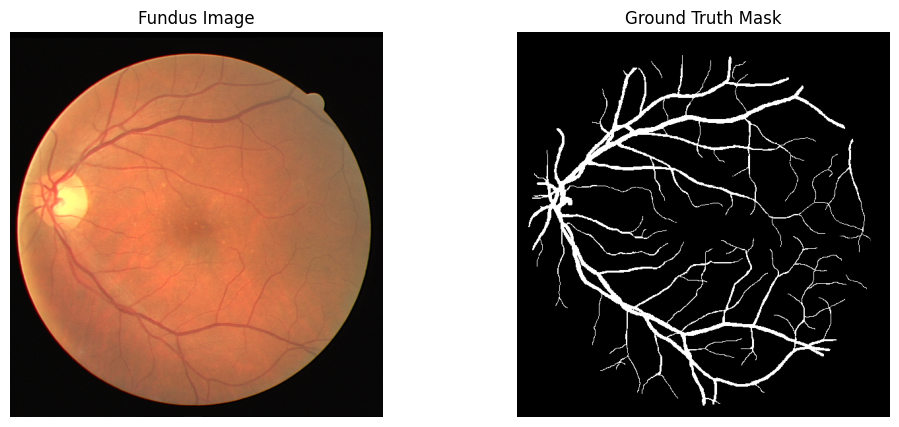

In [4]:
train_images_path = os.path.join(drive_path, "training", "images")
train_manual_path = os.path.join(drive_path, "training", "1st_manual")

image_files = sorted(os.listdir(train_images_path))
manual_files = sorted(os.listdir(train_manual_path))

print("Total training images:", len(image_files))

image_path = os.path.join(train_images_path, image_files[0])
manual_path = os.path.join(train_manual_path, manual_files[0])

print("Selected Image:", image_files[0])
print("Ground Truth:", manual_files[0])

retinal_image = cv2.imread(image_path)
retinal_rgb = cv2.cvtColor(retinal_image, cv2.COLOR_BGR2RGB)

ground_truth = cv2.imread(manual_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(retinal_rgb)
plt.title("Fundus Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(ground_truth)
plt.title("Ground Truth Mask")
plt.axis("off")

plt.show()

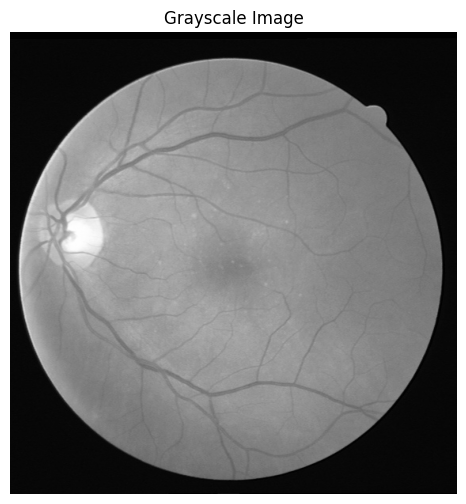

Shape: (584, 565)
Type: uint8


In [5]:
gray_image = cv2.cvtColor(retinal_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image)
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

print("Shape:", gray_image.shape)
print("Type:", gray_image.dtype)

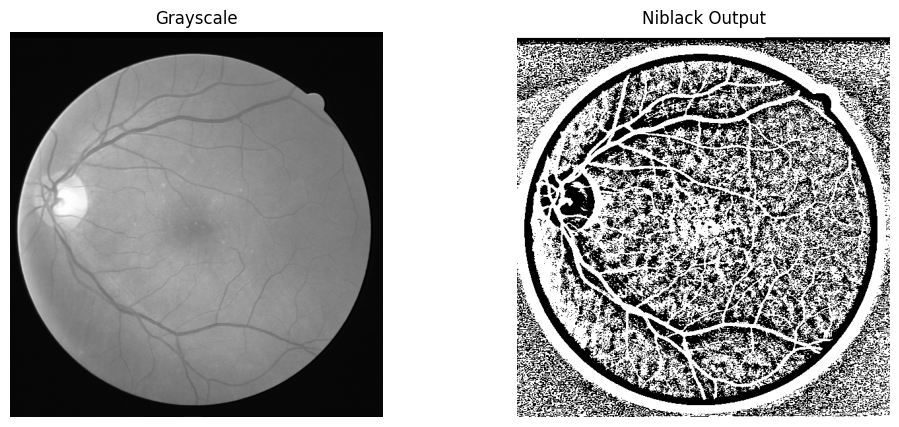

In [6]:
window_size = 25
k = -0.2

niblack_thresh = threshold_niblack(gray_image, window_size=window_size, k=k)

niblack_binary = gray_image < niblack_thresh

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(gray_image)
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_as_ubyte(niblack_binary))
plt.title("Niblack Output")
plt.axis("off")

plt.show()

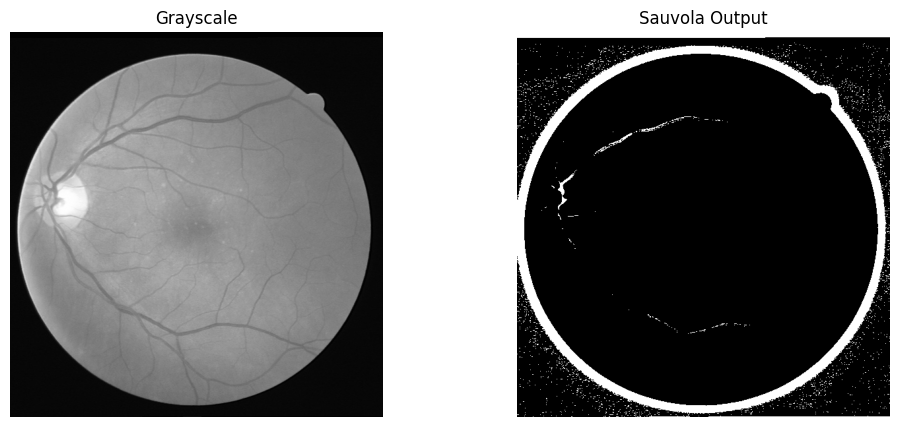

In [7]:
window_size = 25

sauvola_thresh = threshold_sauvola(gray_image, window_size=window_size)

sauvola_binary = gray_image < sauvola_thresh

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(gray_image)
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_as_ubyte(sauvola_binary))
plt.title("Sauvola Output")
plt.axis("off")

plt.show()

C:\Users\pooji\AppData\Local\Temp\ipykernel_24240\3967161007.py:1: FutureWarning: Parameter `min_size` is deprecated since version 0.26.0 and will be removed in 2.0.0 (or later). To avoid this warning, please use the parameter `max_size` instead. For more details, see the documentation of `remove_small_objects`. Note that the new threshold removes objects smaller than **or equal to** its value, while the previous parameter only removed smaller ones.
  niblack_clean = remove_small_objects(niblack_binary, min_size=50)
C:\Users\pooji\AppData\Local\Temp\ipykernel_24240\3967161007.py:2: FutureWarning: Parameter `min_size` is deprecated since version 0.26.0 and will be removed in 2.0.0 (or later). To avoid this warning, please use the parameter `max_size` instead. For more details, see the documentation of `remove_small_objects`. Note that the new threshold removes objects smaller than **or equal to** its value, while the previous parameter only removed smaller ones.
  sauvola_clean = remove

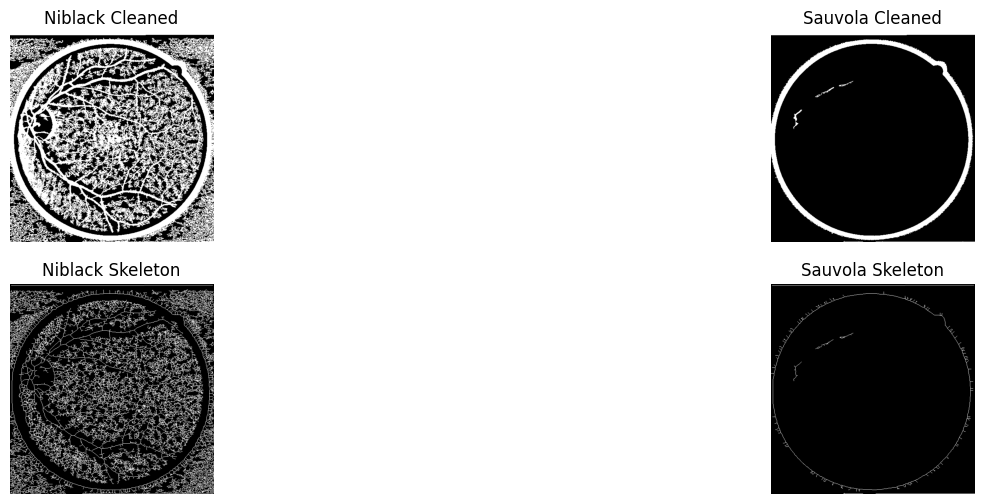

In [8]:
niblack_clean = remove_small_objects(niblack_binary, min_size=50)
sauvola_clean = remove_small_objects(sauvola_binary, min_size=50)

niblack_skeleton = skeletonize(niblack_clean)
sauvola_skeleton = skeletonize(sauvola_clean)

plt.figure(figsize=(18,6))

plt.subplot(2,2,1)
plt.imshow(img_as_ubyte(niblack_clean))
plt.title("Niblack Cleaned")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(img_as_ubyte(sauvola_clean))
plt.title("Sauvola Cleaned")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(img_as_ubyte(niblack_skeleton))
plt.title("Niblack Skeleton")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(img_as_ubyte(sauvola_skeleton))
plt.title("Sauvola Skeleton")
plt.axis("off")

plt.show()

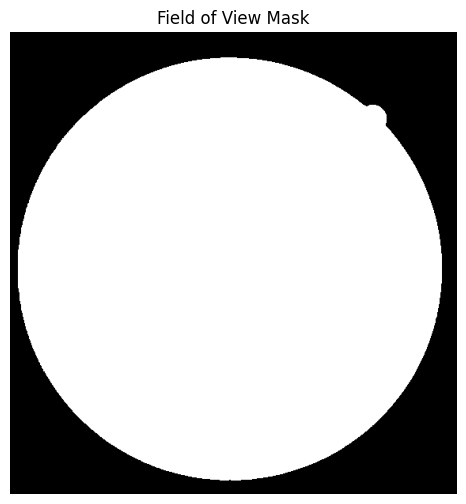

In [9]:
mask_folder = os.path.join(drive_path, "training", "mask")
mask_path = os.path.join(mask_folder, sorted(os.listdir(mask_folder))[0])

fov_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
fov_binary = fov_mask > 0

plt.imshow(fov_binary)
plt.title("Field of View Mask")
plt.axis("off")
plt.show()

In [10]:
ground_truth_binary = ground_truth > 0

niblack_fov = niblack_clean & fov_binary
sauvola_fov = sauvola_clean & fov_binary
gt_fov = ground_truth_binary & fov_binary

In [11]:
def sensitivity_score(gt, pred):
    TP = np.sum((gt == 1) & (pred == 1))
    FN = np.sum((gt == 1) & (pred == 0))
    return TP / (TP + FN + 1e-8)

gt_flat = gt_fov.flatten()
niblack_flat = niblack_fov.flatten()
sauvola_flat = sauvola_fov.flatten()

niblack_sensitivity = sensitivity_score(gt_flat, niblack_flat)
sauvola_sensitivity = sensitivity_score(gt_flat, sauvola_flat)

print("Niblack Sensitivity:", niblack_sensitivity)
print("Sauvola Sensitivity:", sauvola_sensitivity)

Niblack Sensitivity: 0.9121703853951675
Sauvola Sensitivity: 0.02174442190668489


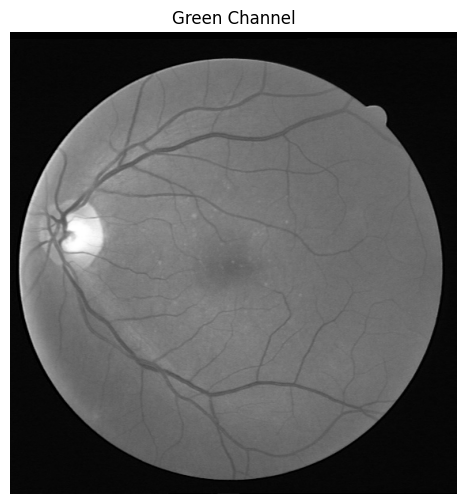

C:\Users\pooji\AppData\Local\Temp\ipykernel_24240\2520735664.py:16: FutureWarning: Parameter `min_size` is deprecated since version 0.26.0 and will be removed in 2.0.0 (or later). To avoid this warning, please use the parameter `max_size` instead. For more details, see the documentation of `remove_small_objects`. Note that the new threshold removes objects smaller than **or equal to** its value, while the previous parameter only removed smaller ones.
  sauvola_green_clean = remove_small_objects(sauvola_green, min_size=50)


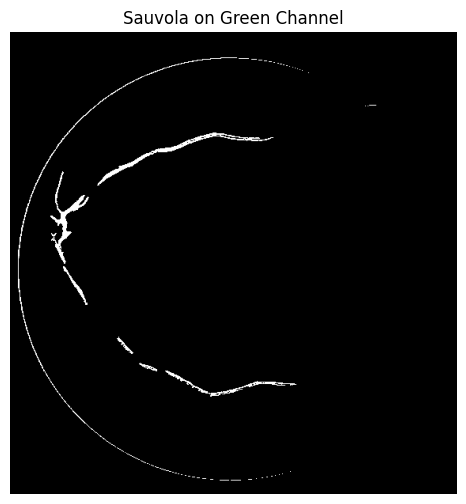

In [12]:
green_channel = retinal_rgb[:, :, 1]

plt.imshow(green_channel)
plt.title("Green Channel")
plt.axis("off")
plt.show()

green_norm = green_channel / 255.0

window_size = 35
k = 0.2

sauvola_thresh = threshold_sauvola(green_norm, window_size=window_size, k=k)

sauvola_green = green_norm < sauvola_thresh
sauvola_green_clean = remove_small_objects(sauvola_green, min_size=50)
sauvola_green_fov = sauvola_green_clean & fov_binary

plt.imshow(sauvola_green_fov)
plt.title("Sauvola on Green Channel")
plt.axis("off")
plt.show()

In [13]:
sauvola_final_flat = sauvola_green_fov.flatten()

sauvola_final_sensitivity = sensitivity_score(gt_flat, sauvola_final_flat)

print("Final Niblack Sensitivity:", niblack_sensitivity)
print("Final Sauvola Sensitivity:", sauvola_final_sensitivity)

Final Niblack Sensitivity: 0.9121703853951675
Final Sauvola Sensitivity: 0.10908722109529043


In [16]:
# Create results folder in current working directory
base_folder = os.getcwd()

results_main_folder = os.path.join(base_folder, "results")

if not os.path.exists(results_main_folder):
    os.makedirs(results_main_folder)

# Create project folder
project_folder = os.path.join(results_main_folder, "Project_3_Retinal_Vessel_Extraction")

if not os.path.exists(project_folder):
    os.makedirs(project_folder)

print("Saving results in:")
print(project_folder)


# Save images
cv2.imwrite(
    os.path.join(project_folder, "final_niblack.png"),
    img_as_ubyte(niblack_fov)
)

cv2.imwrite(
    os.path.join(project_folder, "final_sauvola_green.png"),
    img_as_ubyte(sauvola_green_fov)
)

cv2.imwrite(
    os.path.join(project_folder, "ground_truth.png"),
    img_as_ubyte(gt_fov)
)

# Save metrics
with open(os.path.join(project_folder, "metrics.txt"), "w") as f:
    f.write("Project 3: Retinal Vessel Extraction\n")
    f.write("------------------------------------\n")
    f.write("Niblack Sensitivity: " + str(niblack_sensitivity) + "\n")
    f.write("Sauvola Sensitivity: " + str(sauvola_final_sensitivity) + "\n")

print("Results saved successfully.")

Saving results in:
c:\Users\pooji\OneDrive\Desktop\DL_Projects\results\Project_3_Retinal_Vessel_Extraction
Results saved successfully.


Conclusion

In this project, retinal blood vessels were extracted using two local adaptive thresholding methods: Niblack and Sauvola. The main aim was to identify thin blood vessels from retinal fundus images and compare how well both methods perform using the DRIVE dataset.

Niblack thresholding performed well in this study. It was able to detect most of the blood vessels, including many thin and weak vessels. This is because Niblack calculates the threshold locally, which helps in handling variations across the image. However, it sometimes also detected unwanted noise due to sensitivity to local intensity changes.

Sauvola thresholding, although designed to handle illumination changes better, showed lower performance in this implementation. It detected fewer vessel pixels and missed several thin and faint vessels. This happened because the chosen parameters and preprocessing steps made the method more strict in selecting vessel regions.

The results show that the effectiveness of thresholding methods strongly depends on parameter selection, preprocessing techniques, and image properties. In this project setup, Niblack thresholding gave better sensitivity for thin vessel detection compared to Sauvola.

Overall, this project highlights the importance of adaptive thresholding in medical image segmentation. It also shows that careful tuning of parameters and preprocessing steps is necessary to achieve good vessel extraction results. In this case, Niblack thresholding proved to be more suitable for retinal vessel extraction using the DRIVE dataset.